In [8]:
import os
import numpy as np
import tifffile as tiff

In [2]:
def crop_2d_array(array, crop_areas, crop_indices=None):
    """
    Crop a 2D NumPy array into specified areas.

    Parameters:
        array (np.ndarray): The input 2D array.
        crop_areas (tuple or list): A tuple or a list of tuples of four integers (start_row, end_row, start_col, end_col).
        crop_indices (list, optional): A list of indices corresponding to the crop areas.

    Returns:
        np.ndarray or list: The cropped 2D array or a list of cropped arrays (optionally with indices).
    """
    def crop_area(area):
        start_row, end_row, start_col, end_col = area
        return array[start_row:end_row, start_col:end_col]

    if isinstance(crop_areas, list):
        if crop_indices is None:
            return [crop_area(area) for area in crop_areas]
        else:
            return [(idx, crop_area(area)) for idx, area in zip(crop_indices, crop_areas)]
    else:
        return crop_area(crop_areas)

In [3]:
img1 = tiff.imread('/Volumes/scratch/DIMA/chiodin/tests/test444/data/output/image_conversion/2024.08.30_DAPI_PPARgamma_PDL1/785R1_DAPI_PPARgamma_PDL1.ome.tiff')
img2 = tiff.imread('/Volumes/scratch/DIMA/chiodin/tests/test444/data/output/image_conversion/2024.08.31_DAPI_PD1_SRSF3/785R1_DAPI_PD1_SRSF3.ome.tiff')
img3 = tiff.imread('/Volumes/scratch/DIMA/chiodin/tests/test444/data/output/image_conversion/2024.09.01_DAPI_p53_CD3/785R1_DAPI_p53_CD3.ome.tiff')

img1 = np.transpose(img1, (1, 2, 0))
img2 = np.transpose(img2, (1, 2, 0))
img3 = np.transpose(img3, (1, 2, 0))

img1 = crop_2d_array(img1, crop_areas=(0, 2080, 0, 2070))
img2 = crop_2d_array(img2, crop_areas=(0, 2000, 0, 2090))
img3 = crop_2d_array(img3, crop_areas=(0, 2030, 0, 2050))

In [16]:
tiff.imwrite(
    '/Volumes/scratch/DIMA/chiodin/tests/test444/data/output/image_conversion/2024.08.30_DAPI_PPARgamma_PDL1/785R1_DAPI_PPARgamma_PDL1_CROP.ome.tiff', 
    img1
)

tiff.imwrite(
    '/Volumes/scratch/DIMA/chiodin/tests/test444/data/output/image_conversion/2024.08.31_DAPI_PD1_SRSF3/785R1_DAPI_PD1_SRSF3_CROP.ome.tiff', 
    img2
)


tiff.imwrite(
    '/Volumes/scratch/DIMA/chiodin/tests/test444/data/output/image_conversion/2024.09.01_DAPI_p53_CD3/785R1_DAPI_p53_CD3_CROP.ome.tiff', 
    img3)



In [24]:
i1 = tiff.imread('/Volumes/scratch/DIMA/chiodin/tests/test444/data/output/image_registration/2024.08.31_DAPI_PD1_SRSF3/785R1_DAPI_PD1_SRSF3.ome.tiff')

i2 = tiff.imread('/Volumes/scratch/DIMA/chiodin/tests/test444/data/output/image_registration/2024.09.01_DAPI_p53_CD3/785R1_DAPI_p53_CD3.ome.tiff')

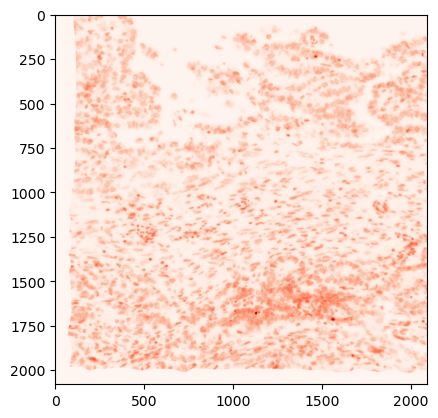

In [23]:
import matplotlib.pyplot as plt

plt.imshow(i1[:,:,2], cmap='Reds')
plt.show()

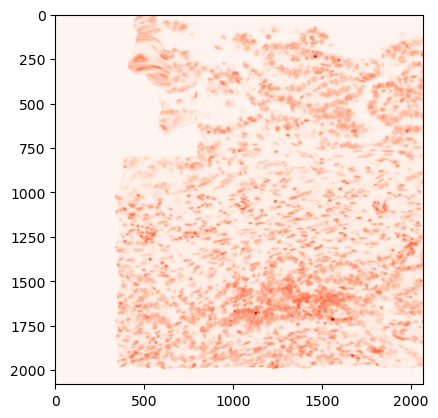

In [25]:
plt.imshow(i2[:,:,2], cmap='Reds')
plt.show()

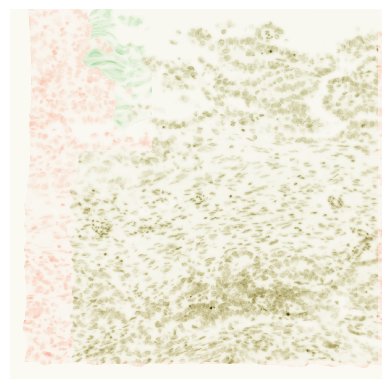

In [29]:
import numpy as np
import matplotlib.pyplot as plt

def overlay_images(image1, image2, cmap1='gray', cmap2='jet', alpha=0.5):
    """
    Overlays two images using different colormaps for comparison.
    
    Parameters:
    - image1: First image to display.
    - image2: Second image to display.
    - cmap1: Colormap for the first image.
    - cmap2: Colormap for the second image.
    - alpha: Transparency level for the second image (0.0 transparent, 1.0 opaque).
    """
    # Ensure both images are of the same shape by zero-padding if necessary
    shape1 = image1.shape
    shape2 = image2.shape
    max_shape = tuple(max(shape1[i], shape2[i]) for i in range(len(shape1)))

    # Create zero-padded versions of the images
    padded_image1 = np.zeros(max_shape)
    padded_image2 = np.zeros(max_shape)

    padded_image1[tuple(slice(0, s) for s in shape1)] = image1
    padded_image2[tuple(slice(0, s) for s in shape2)] = image2

    # Create a plot with the two images overlaid
    plt.imshow(padded_image1, cmap=cmap1, interpolation='none')
    plt.imshow(padded_image2, cmap=cmap2, interpolation='none', alpha=alpha)
    
    # Turn off axis labels
    plt.axis('off')
    plt.show()


overlay_images(i1[:,:,2], i2[:,:,2], cmap1='Reds', cmap2='Greens', alpha=0.6)
